`SciPy` is a Python library which builds on the `NumPy` framework to provide higher-level functions such as Fourier Transforms, integration, and graph making. It is divided into several submodules, each of which provides numerous functions.

Because of this, you only need to import part of the module.

`SciPy` is especailly powerful when combined with other libraries such as `matplotlib` and `IPython.display`

In [26]:
from scipy import *
import scipy.optimize as opt
import matplotlib.pyplot as plt
from IPython.display import Image
import numpy as np

We will also use `Pandas` to import data from a .csv. In this case, the data will be the number of ICU beds and population in various counties across the United States.

In [27]:
import pandas as pd

Using `Pandas` to import the .csv, we will then use the resulting DataFrame to create a scatter plot of population vs. number of ICU beds and create a best fit line for the graph.

In [28]:
data = pd.read_csv("kaggleBeds.csv")

In [29]:
data

,State,County,ICU Beds,Total Population,Population Aged 60+,Percent of Population Aged 60+,Residents Aged 60+ Per Each ICU Bed
0,Alabama,Autauga,6,55036,10523,19.1,1754.0
1,Alabama,Baldwin,51,203360,53519,26.3,1049.0
2,Alabama,Barbour,5,26201,6150,23.5,1230.0
3,Alabama,Bibb,0,22580,4773,21.1,NaN
4,Alabama,Blount,6,57667,13600,23.6,2267.0
...,...,...,...,...,...,...,...
3137,Wyoming,Sweetwater,10,44527,7015,15.8,702.0
3138,Wyoming,Teton,6,22923,4298,18.7,716.0
3139,Wyoming,Uinta,6,20758,3554,17.1,592.0
3140,Wyoming,Washakie,0,8253,2206,26.7,NaN


In [30]:
popData = data['Total Population'].to_numpy()
bedData = data["ICU Beds"].to_numpy()
popData, bedData

(array([ 55036, 203360,  26201, ...,  20758,   8253,   7117], dtype=int64),
 array([ 6, 51,  5, ...,  6,  0,  0], dtype=int64))

We convert the relevant parts of the DataFrame (total population and number of ICU beds) into NumPy arrays using the `to_numpy()` function, then use them to create a scatter plot using `matplotlib`. We will then create a line of best fit. If there is a strong correlation between the data points and the line of best fit, we will be able to say that the number of ICU beds correlates with population.

To do so, first we use the function polyfit to create a slope and y-intercept for a line with a degree of 1. We then create a  figure and axes with the subplots function.

The axes object is used to make the scatter plot and label the graph appropriately, and then the line of best fit is plotted on top. We can then analyse the resulting graph to determine the presence of correlation.

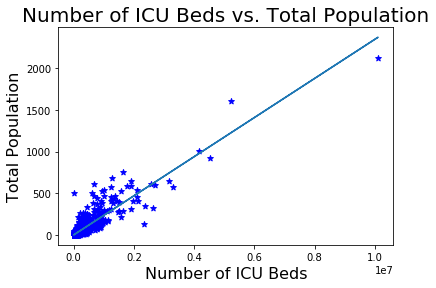

In [47]:
m,b = np.polyfit(popData, bedData,1)


fig, axes = plt.subplots()

axes.scatter(popData,bedData,c='b',marker='*')
axes.set_xlabel('Number of ICU Beds', fontsize=16)
axes.set_ylabel('Total Population', fontsize=16)
axes.set_title('Number of ICU Beds vs. Total Population',fontsize=20)
axes.plot(popData, m*popData + b)

The line of best fit follows the general pattern. As the population increases, the number of ICU beds increases as well, with the rates staying roughly constant for both variables. 